<a href="https://colab.research.google.com/github/aezamsos/data-statistics-analytics-python/blob/main/HackathonInstagram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

account_username    0
reel_id             0
content_domain      0
upload_date         0
views               0
likes               0
comments            0
comment_text        0
caption             0
hashtags            0
music_used          0
reel_length         0
dtype: int64
             views        likes    comments  reel_length
count   500.000000   500.000000  500.000000   500.000000
mean   5008.496000  2413.444000  511.022000    48.622000
std    2765.616895  1440.733779  286.554967    24.509765
min     105.000000    11.000000    0.000000     5.000000
25%    2669.750000  1086.000000  285.750000    27.750000
50%    4973.000000  2322.000000  516.000000    50.500000
75%    7301.500000  3635.500000  767.500000    70.000000
max    9965.000000  4979.000000  998.000000    89.000000


<ipython-input-12-274b76a783b2>:21: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



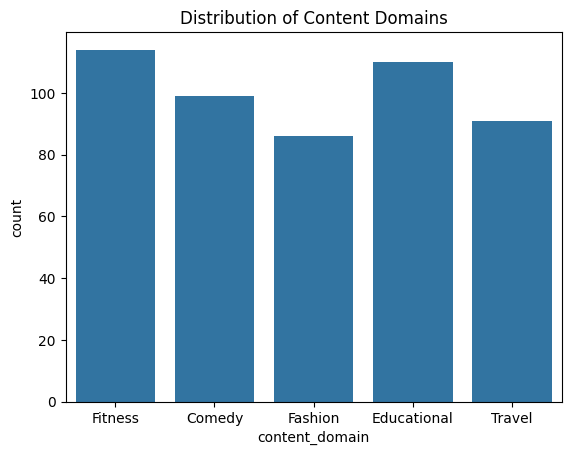

      reel_id  views  likes  comments content_domain
229  reel_229   8766   4974       917        Fashion
344  reel_344   2699   4979       775        Fashion
431  reel_431   9928   4943       769        Fitness
282  reel_282   1581   4712       987         Comedy
164  reel_164   7963   4805       803    Educational


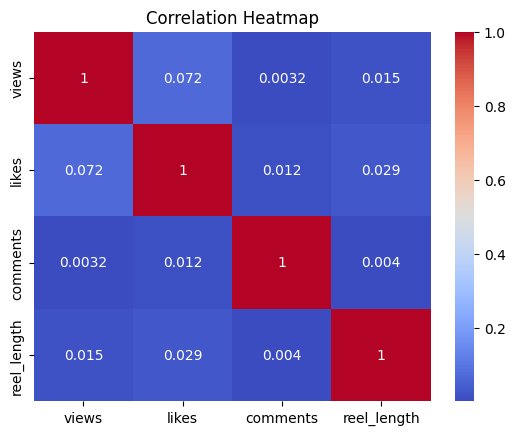

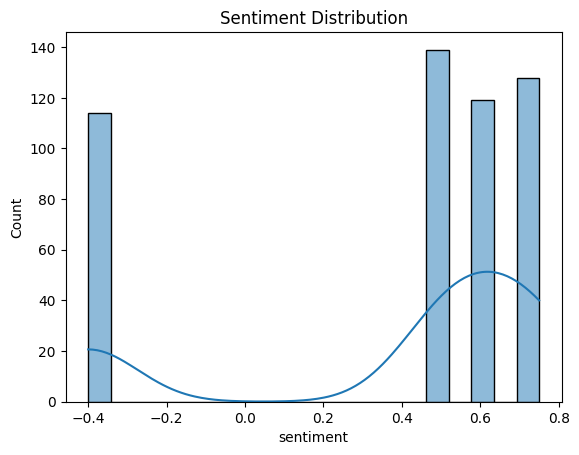

           sentiment     views     likes  comments
sentiment   1.000000 -0.013364 -0.036029 -0.025253
views      -0.013364  1.000000  0.072027  0.003156
likes      -0.036029  0.072027  1.000000  0.011948
comments   -0.025253  0.003156  0.011948  1.000000


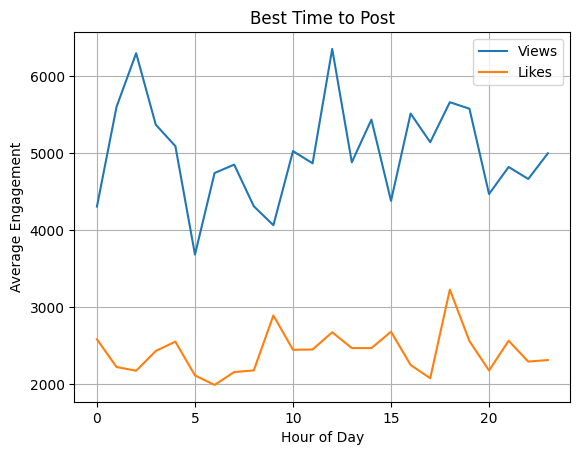

                      views        likes    comments
content_domain                                      
Fashion         5299.209302  2646.255814  497.360465
Travel          5244.549451  2117.802198  422.835165
Fitness         5210.631579  2553.657895  548.342105
Educational     4739.627273  2285.200000  544.718182
Comedy          4604.959596  2463.989899  523.535354


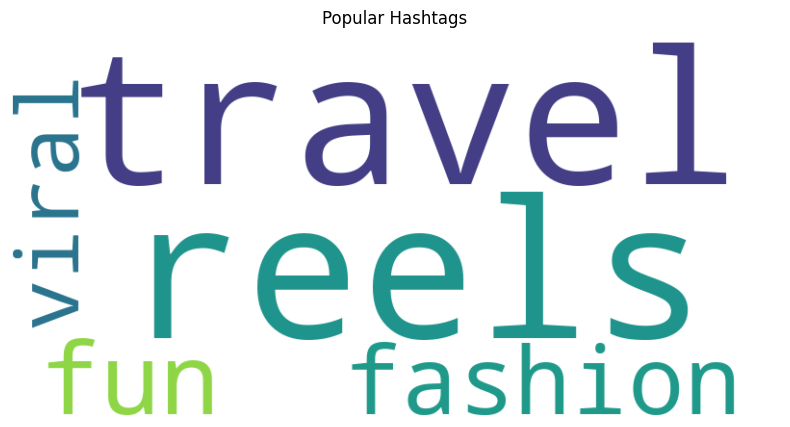

                  views        likes    comments
music_used                                      
Song A      5232.534884  2468.100775  504.426357
None        5204.386861  2284.087591  510.029197
Song C      4803.190909  2530.445455  546.509091
Song B      4741.120968  2395.709677  487.500000


In [12]:
#Imported necessary libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from textblob import TextBlob
import datetime as dt

#The dataset:
np.random.seed(42)
num_reels = 500
content_domains = ['Comedy', 'Educational', 'Fashion', 'Travel', 'Fitness']

df = pd.DataFrame({
    'account_username': np.random.choice(['user1','user2','user3','user4'], num_reels),
    'reel_id': [f'reel_{i}' for i in range(num_reels)],
    'content_domain': np.random.choice(content_domains, num_reels),
    'upload_date': pd.date_range(start='2024-01-01', periods=num_reels, freq='H'),
    'views': np.random.randint(100, 10000, num_reels),
    'likes': np.random.randint(10, 5000, num_reels),
    'comments': np.random.randint(0, 1000, num_reels),
    'comment_text': np.random.choice(['Amazing!', 'Love it!', 'Not great', 'Could be better'], num_reels),
    'caption': np.random.choice(['Best day!', 'Check this out!', 'Travel goals', 'Fashion tips'], num_reels),
    'hashtags': np.random.choice(['#fun','#viral','#reels','#fashion','#travel'], num_reels),
    'music_used': np.random.choice(['Song A','Song B','Song C','None'], num_reels),
    'reel_length': np.random.randint(5, 90, num_reels)
})

# Preview the data
df.head()
# Check for missing values:
print(df.isnull().sum())
# Handle duplicates:
df.drop_duplicates(subset='reel_id', inplace=True)
# Convert data types:
df['upload_date'] = pd.to_datetime(df['upload_date'])
# Remove outliers (if necessary):
df = df[(df['views'] < 100000) & (df['likes'] < 10000) & (df['comments'] < 5000)]

# Descriptive Statistics (45 minutes to 1 hour)
# Summary Statistics for Key Metrics:
summary = df[['views','likes','comments','reel_length']].describe()
print(summary)

# Distribution of Content Domains:
sns.countplot(x='content_domain', data=df)
plt.title('Distribution of Content Domains')
plt.show()

# Top 5 Reels by Engagement:
df['engagement'] = df['likes'] + df['comments']
top_reels = df.sort_values(by='engagement', ascending=False).head(5)
print(top_reels[['reel_id','views','likes','comments','content_domain']])

# Correlation Heatmap:
corr = df[['views','likes','comments','reel_length']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter Plot of Views vs. Likes:
fig = px.scatter(df, x='views', y='likes', color='content_domain', title='Views vs. Likes')
fig.show()

# Analyze Comment Sentiments
def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['comment_text'].apply(get_sentiment)

# Sentiment Distribution:
sns.histplot(df['sentiment'], kde=True, bins=20)
plt.title('Sentiment Distribution')
plt.show()

# Relationship Between Sentiment and Engagement:
sentiment_corr = df[['sentiment','views','likes','comments']].corr()
print(sentiment_corr)

#Daily Engagement Trends:
df['upload_day'] = df['upload_date'].dt.date
daily = df.groupby('upload_day').agg({'views':'sum','likes':'sum','comments':'sum'})
fig = px.line(daily, x=daily.index, y=['views','likes','comments'], title='Daily Engagement Trends')
fig.show()

#Best Time to Post Analysis:
df['hour'] = df['upload_date'].dt.hour
hourly_avg = df.groupby('hour')[['views','likes','comments']].mean()
plt.plot(hourly_avg.index, hourly_avg['views'], label='Views')
plt.plot(hourly_avg.index, hourly_avg['likes'], label='Likes')
plt.xlabel('Hour of Day')
plt.ylabel('Average Engagement')
plt.legend()
plt.title('Best Time to Post')
plt.grid(True)
plt.show()

#Content Domain Performance:
domain_perf = df.groupby('content_domain')[['views','likes','comments']].mean().sort_values('views', ascending=False)

print(domain_perf)

#Hashtag Frequency Word Cloud:
hashtags = ' '.join(df['hashtags'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(hashtags)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Popular Hashtags')
plt.show()

# Music Performance:
music_perf = df.groupby('music_used')[['views','likes','comments']].mean().sort_values('views', ascending=False)
print(music_perf)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from wordcloud import WordCloud
from textblob import TextBlob
import datetime as dt

# Load dataset from CSV
df = pd.read_csv('instagra.csv')

# Ensure proper datetime format
df['upload_date'] = pd.to_datetime(df['upload_date'])

# Handle duplicates and missing values as needed
df.drop_duplicates(subset='reel_id', inplace=True)

# Preview the data
print(df.head())
